In [1]:
import pandas as pd
import numpy as np

#Abrimos los df y guardamos en distintas variables
# df_fst = pd.read_csv("embeddings_fst.csv")
# fst=df_fst.iloc[:,:100]
# df_fst_mod=pd.read_csv("mod_embeddings_fst_V1.csv")
# fst_mod=df_fst_mod.iloc[:,:100]
# df_w2v = pd.read_csv("embeddings_w2v.csv")
# w2v=df_w2v.iloc[:,:100]
# df_w2v_mod = pd.read_csv("mod_embeddings_w2v_V1.csv")
# w2v_mod=df_w2v_mod.iloc[:,:100]
# df_fst_mod_K=pd.read_csv("mod_embeddings_fst_with_k.csv")
# df_w2v_mod_K=pd.read_csv("mod_embeddings_w2v_with_k.csv")

df_fst = pd.read_csv("embeddings_fst.csv")
fst=df_fst.iloc[:,:100]
df_fst_mod=pd.read_csv("fst_mod.csv")
fst_mod=df_fst_mod.iloc[:,:100]
df_w2v = pd.read_csv("embeddings_w2v.csv")
w2v=df_w2v.iloc[:,:100]
df_w2v_mod = pd.read_csv("w2v_mod.csv")
w2v_mod=df_w2v_mod.iloc[:,:100]
df_fst_mod_K=pd.read_csv("mod_embeddings_fst_with_k.csv")
df_w2v_mod_K=pd.read_csv("mod_embeddings_w2v_with_k.csv")

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

X=fst
for i in range(8):

    num=i+2

    clustering = KMeans(n_clusters=num)
    clustering.fit(fst)
    y_clusters = clustering.predict(fst)
    clusters = clustering.labels_

    kmeans_labels=y_clusters
    print(f"numero de clusters:{num}")
    # Silhouette Score
    silhouette_avg = silhouette_score(X, kmeans_labels)
    print(f"Silhouette Score: {silhouette_avg}")

numero de clusters:2
Silhouette Score: 0.20829187119939468
numero de clusters:3
Silhouette Score: 0.2680484684275985
numero de clusters:4
Silhouette Score: 0.2549177490310852
numero de clusters:5
Silhouette Score: 0.41863554816081167
numero de clusters:6
Silhouette Score: 0.4491391086904015
numero de clusters:7
Silhouette Score: 0.5358093182590499
numero de clusters:8
Silhouette Score: 0.5790628168825888
numero de clusters:9
Silhouette Score: 0.5644945812244989


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
def silhoutteDF(D,str="Nombre del este"):
    print(str)
    listaSilhouttes=[]
    for i in range(10):
        num=i+2

        clustering = KMeans(n_clusters=num,n_init=10)
        clustering.fit(D)
        y_clusters = clustering.predict(D)

        # Silhouette Score
        silhouette_avg = silhouette_score(D, y_clusters)
        listaSilhouttes.append(silhouette_avg)
        print(f"Clusters:{num} ,Silhouette Score: {silhouette_avg} ")
        #print(f"Silhouette Score: {silhouette_avg}")
    return listaSilhouttes

In [7]:
print("Todos los 100 Componentes")
fst_list=silhoutteDF(fst,"fst")
fst_mod_list=silhoutteDF(fst_mod,"fst modulado")
w2v_list=silhoutteDF(w2v,"w2v")
w2v_mod_list=silhoutteDF(w2v_mod,"w2v modulado")


Todos los 100 Componentes
fst
Clusters:2 ,Silhouette Score: 0.27175281022143766 
Clusters:3 ,Silhouette Score: 0.2699285911214857 
Clusters:4 ,Silhouette Score: 0.36251350906978086 
Clusters:5 ,Silhouette Score: 0.43944653784885973 
Clusters:6 ,Silhouette Score: 0.4937015921187537 
Clusters:7 ,Silhouette Score: 0.5209649132271269 
Clusters:8 ,Silhouette Score: 0.5712238030168131 
Clusters:9 ,Silhouette Score: 0.5686286321466668 
Clusters:10 ,Silhouette Score: 0.5792386322503674 
Clusters:11 ,Silhouette Score: 0.5559274943467812 
fst modulado
Clusters:2 ,Silhouette Score: 0.1876327759051047 
Clusters:3 ,Silhouette Score: 0.25052502697937884 
Clusters:4 ,Silhouette Score: 0.2986702046712519 
Clusters:5 ,Silhouette Score: 0.3611776284773895 
Clusters:6 ,Silhouette Score: 0.41556768089053336 
Clusters:7 ,Silhouette Score: 0.4463238331063604 
Clusters:8 ,Silhouette Score: 0.4645077832306086 
Clusters:9 ,Silhouette Score: 0.47456447705876265 
Clusters:10 ,Silhouette Score: 0.5130373530481463

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
def silhoutteDFEtiqueta(D,str="Nombre del este"):
    num=8
    D_clean=D.iloc[:,:100]
    le = LabelEncoder()
    D.iloc[:,100:101] = le.fit_transform(D.iloc[:,100:101].values)
    print(str)
    # Silhouette Score
    silhouette_avg = silhouette_score(D_clean, D.iloc[:,100:101])
    # print(f"Clusters:{num} ,Silhouette Score: {silhouette_avg} ")
    print(f"Silhouette Score: {silhouette_avg}")

In [9]:
silhoutteDFEtiqueta(df_fst,"fst")
silhoutteDFEtiqueta(df_fst_mod,"fst_mod")
silhoutteDFEtiqueta(df_fst_mod_K,"fst_mod_K")
silhoutteDFEtiqueta(df_w2v,"w2v")
silhoutteDFEtiqueta(df_w2v_mod,"w2v_mod")
silhoutteDFEtiqueta(df_w2v_mod_K,"w2v_mod_K")

fst


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.5801749029069899
fst_mod


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4678943412362683
fst_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4569901693347853
w2v


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.07731901966752398
w2v_mod


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.0009782464308104538
w2v_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.017132060072775842


In [10]:
silhoutteDFEtiqueta(df_w2v_mod_K,"w2v_mod_K")
silhoutteDFEtiqueta(df_fst_mod_K,"fst_mod_K")

w2v_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.017132060072775842
fst_mod_K


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score: 0.4569901693347853


In [2]:
def grafica(D1,D2,titulo="Titulo de la grafica"):
        
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
        
    pasos=range(len(D1))
    pasos=[a+2 for a in pasos]
    ax.plot(pasos[:],D1[:],
            color='green',
            linewidth=1,
            label='Score')
    
    pasos=range(len(D2))
    pasos=[a+2 for a in pasos]
    ax.plot(pasos[:],D2[:],
            color='blue',
            linewidth=1,
            label='Modulated Score')
    
    plt.title(titulo)
    plt.xlabel('Clusters')
    plt.ylabel('Score')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

In [3]:
grafica(fst_list,fst_mod_list,"silhouette fst")
grafica(w2v_list,w2v_mod_list,"silhouette w2v")

NameError: name 'fst_list' is not defined

In [13]:
# pca = PCA(n_components=3)

# #Los guardamos
# principalComponents_fst = pca.fit_transform(fst)
# principalDf_fst = pd.DataFrame(data = principalComponents_fst
#              , columns = ['pc1', 'pc2','pc3'])

# principalComponents_fst_mod = pca.fit_transform(fst_mod)
# principalDf_fst_mod = pd.DataFrame(data = principalComponents_fst_mod
#              , columns = ['pc1', 'pc2','pc3'])

# principalComponents_w2v = pca.fit_transform(w2v)
# principalDf_w2v = pd.DataFrame(data = principalComponents_w2v
#              , columns = ['pc1', 'pc2','pc3'])

# principalComponents_w2v_mod = pca.fit_transform(w2v_mod)
# principalDf_w2v_mod = pd.DataFrame(data = principalComponents_w2v_mod
#              , columns = ['pc1', 'pc2','pc3'])

# print("PCA- 3 Componentes principales")
# # silhoutteDF(principalDf_fst,"fst")
# # silhoutteDF(principalDf_fst_mod,"fst modulado")
# # silhoutteDF(principalDf_w2v,"w2v")
# # silhoutteDF(principalDf_w2v_mod,"w2v modulado")
# PCA3_fst_NMI_list=NMI(principalDf_fst,"fst")
# PCA3_fst_mod_NMI_list=NMI(df_fst_mod,"fst_mod")
# PCA3_w2v_NMI_list=NMI(df_w2v,"w2v")
# PCA3_w2v_mod_NMI_list=NMI(df_w2v_mod)
# grafica(principalComponents_fst,principalComponents_fst,"NMI fst")

PCA- 3 Componentes principales


NameError: name 'NMI' is not defined

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import normalized_mutual_info_score





def NMI(D,str="Nombre del este"):
    # Convertir etiquetas categóricas a numéricas
    listaNMI=[]
    D_clean=D.iloc[:,:100]
    for i in range(10):
        num=i+2
        #Convertir las etiquetas de emociones a int
        le = LabelEncoder()
        D.iloc[:,100:101] = le.fit_transform(D.iloc[:,100:101])

        #El clustering
        clustering = KMeans(n_clusters=num,n_init=10)
        clustering.fit(D_clean)
        y_clusters = clustering.predict(D_clean)
        #Sacamos las etiquetas conocidas del dataframe
        knownLabels=D.iloc[:,100:101].values.ravel()
        # Calcular NMI
        nmi_score = normalized_mutual_info_score(knownLabels, y_clusters)
        listaNMI.append(nmi_score)
        # print("Clusters: ",num)
        # print("Normalized Mutual Information (NMI):", nmi_score)
    return listaNMI


In [15]:
fst_NMI_list=NMI(df_fst,"fst")
fst_mod_NMI_list=NMI(df_fst_mod,"fst_mod")
w2v_NMI_list=NMI(df_w2v,"w2v")
w2v_mod_NMI_list=NMI(df_w2v_mod)


/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/pr

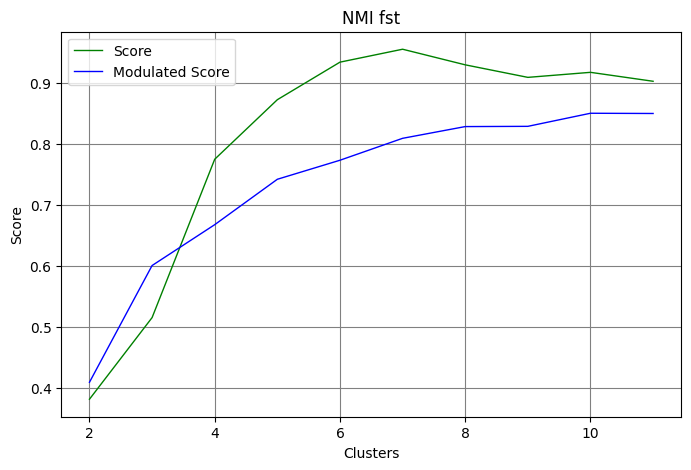

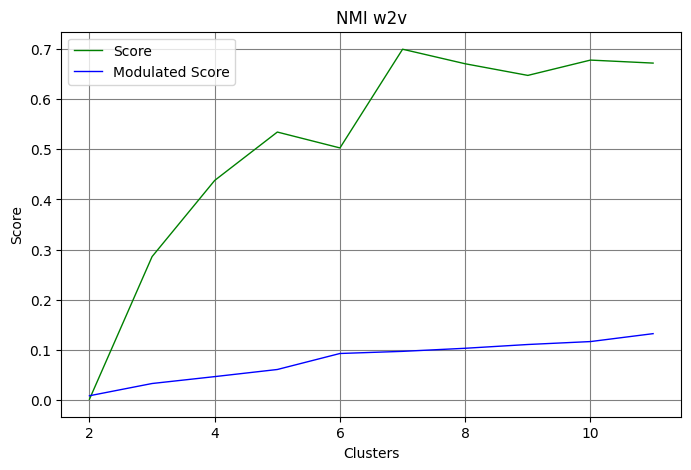

In [16]:
grafica(fst_NMI_list,fst_mod_NMI_list,"NMI fst")
grafica(w2v_NMI_list,w2v_mod_NMI_list,"NMI w2v")

/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/proyectoHermosillo/MODULACION/.env/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/luismontesillo/Documents/pr

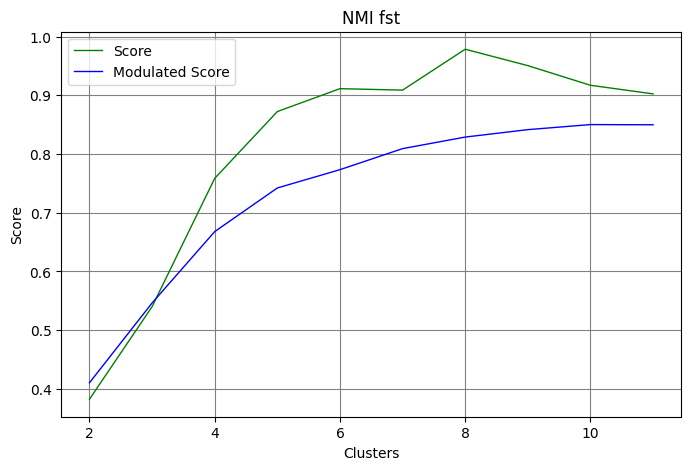

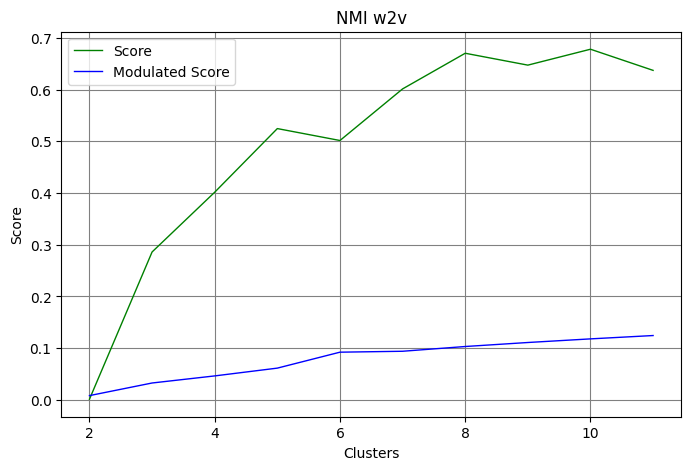

In [17]:
fst_NMI_list=NMI(df_fst,"fst")
fst_mod_NMI_list=NMI(df_fst_mod,"fst_mod")
w2v_NMI_list=NMI(df_w2v,"w2v")
w2v_mod_NMI_list=NMI(df_w2v_mod)

grafica(fst_NMI_list,fst_mod_NMI_list,"NMI fst")
grafica(w2v_NMI_list,w2v_mod_NMI_list,"NMI w2v")